## Data Description

# Dataset Overview:
- Contains 10 years of daily weather data from various locations in Australia.
- Aim is to predict if it will rain the next day (Yes/No) based on the variable "RainTomorrow."

# Source:
- Data created by Adam Young.
- Obtained from Kaggle with guidance from tutor Mr. Bibek Khannal.
- Source of daily observations: [Bureau of Meteorology](http://www.bom.gov.au/climate/data).

# Details:
- "RainTomorrow" is marked as Yes if rainfall is 1mm or more.
- Observations from multiple weather stations.

# Copyright:
- Copyright belongs to Commonwealth of Australia 2010, Bureau of Meteorology.

# Last Checked:
- Dataset last checked on December 21, 2023.


In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_csv('./data/weatherAUS.csv')

# Display basic information about the dataset
print(weather_data.info(memory_usage=True))

# Display summary statistics
print(weather_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Cleaning

        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          4.8       8.4   
1 2008-12-02   Albury      7.4     25.1       0.0          4.8       8.4   
2 2008-12-03   Albury     12.9     25.7       0.0          4.8       8.4   
3 2008-12-04   Albury      9.2     28.0       0.0          4.8       8.4   
4 2008-12-05   Albury     17.5     32.3       1.0          4.8       8.4   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       100

<Figure size 1400x800 with 0 Axes>

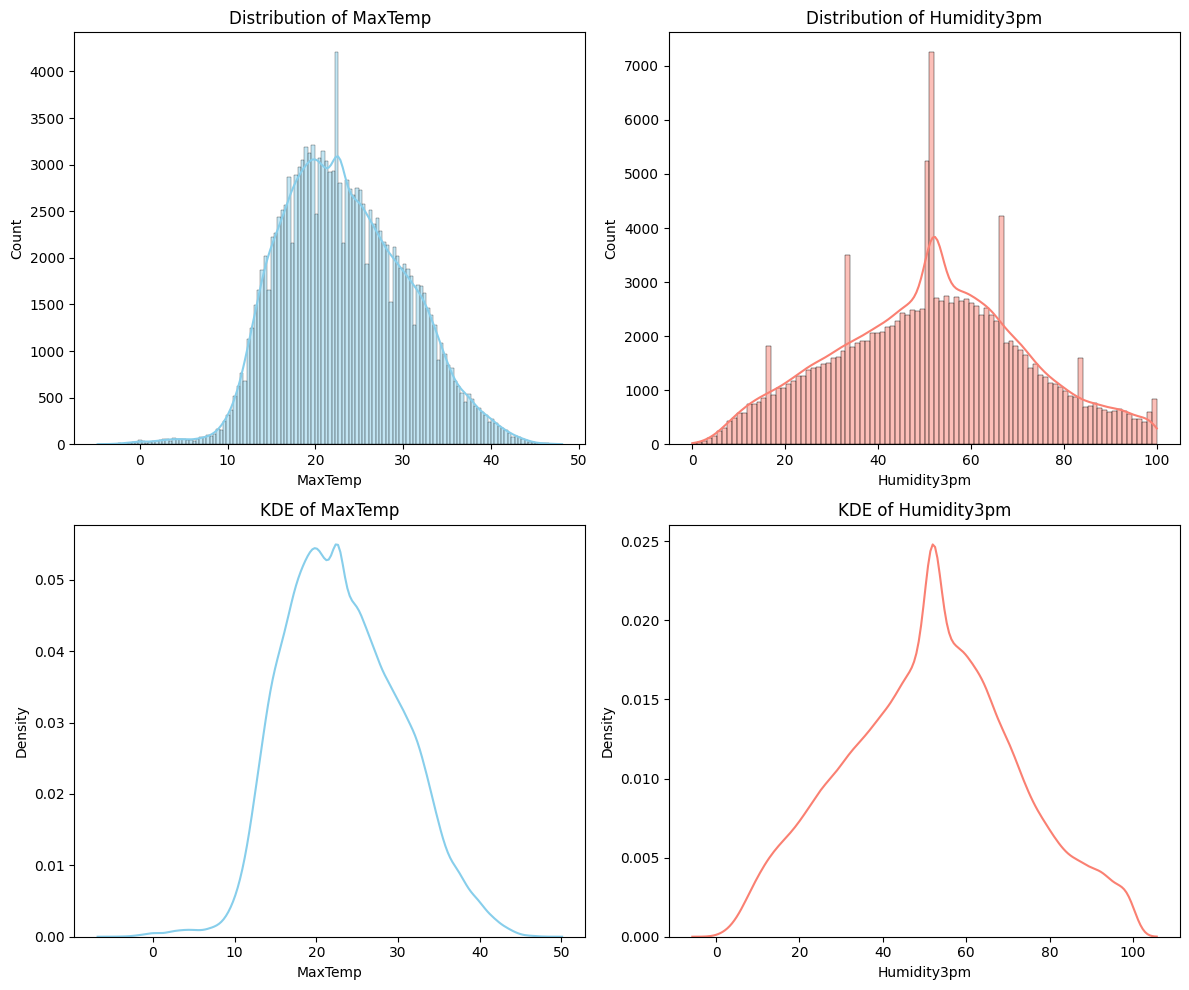

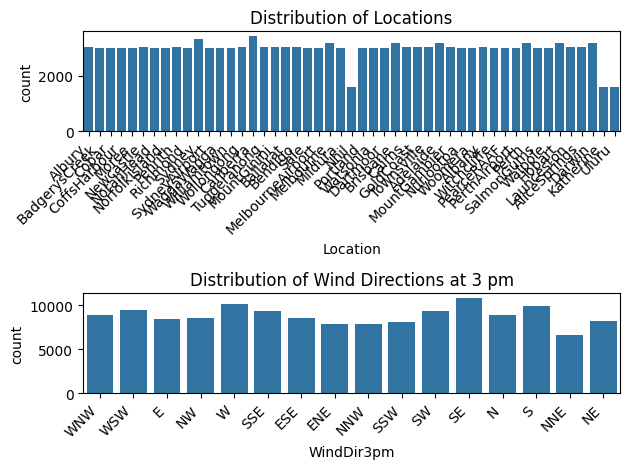

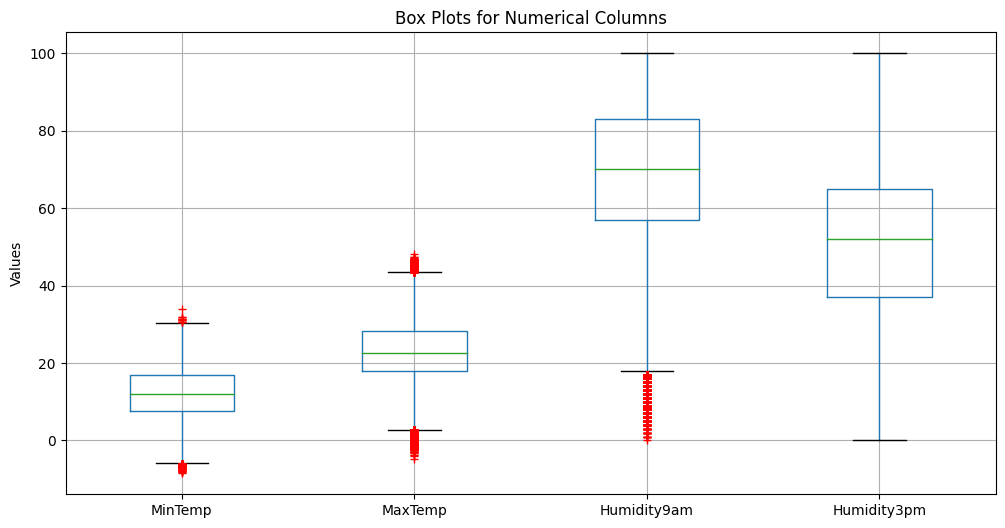

In [24]:
# Remove duplicate entries
weather_data.drop_duplicates(inplace=True)

# Impute missing values in temperature and humidity columns with mean values
columns_to_impute = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']

weather_data[columns_to_impute] = weather_data[columns_to_impute].apply(lambda x: x.fillna(x.median()))


# Additional cleaning: Convert date-related columns to a consistent format
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%Y-%m-%d')

# Display the cleaned dataset
print(weather_data.head())

# Summary Statistics
numeric_summary = weather_data.describe()

# Unique values in categorical columns
unique_locations = weather_data['Location'].unique()
unique_wind_directions = weather_data[['WindGustDir', 'WindDir9am', 'WindDir3pm']].stack().unique()

print("Summary Statistics:")
print(numeric_summary)

print("\nUnique Locations:")
print(unique_locations)

print("\nUnique Wind Directions:")
print(unique_wind_directions)

# Visualization for categorical columns
plt.figure(figsize=(14, 8))

# Assuming 'weather_data' is your DataFrame with relevant data

# Selecting the variables for analysis
max_temp_data = weather_data['MaxTemp']
humidity_data = weather_data['Humidity3pm']

# Creating a figure with subplots for analyzing skewness and modality
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotting distribution and KDE for MaxTemp
sns.histplot(max_temp_data, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of MaxTemp')

# Plotting distribution and KDE for Humidity3pm
sns.histplot(humidity_data, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Humidity3pm')

# Adding KDE plots for better visualization
sns.kdeplot(max_temp_data, ax=axes[1, 0], color='skyblue')
sns.kdeplot(humidity_data, ax=axes[1, 1], color='salmon')

# Setting titles for KDE plots
axes[1, 0].set_title('KDE of MaxTemp')
axes[1, 1].set_title('KDE of Humidity3pm')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
# Plot for Location distribution
plt.subplot(2, 1, 1)
sns.countplot(x='Location', data=weather_data)
plt.title('Distribution of Locations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot for Wind Direction distribution
plt.subplot(2, 1, 2)
sns.countplot(x='WindDir3pm', data=weather_data)
plt.title('Distribution of Wind Directions at 3 pm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

## Outliers in box plot necessary 
# Select numerical columns for box plot
numeric_columns = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']

plt.tight_layout()  # Adjust layout to prevent overlap
plt.figure(figsize=(12, 6))
weather_data[numeric_columns].boxplot(sym='r+')
plt.title('Box Plots for Numerical Columns')
plt.ylabel('Values')

plt.show()


## Visualize the Data set 

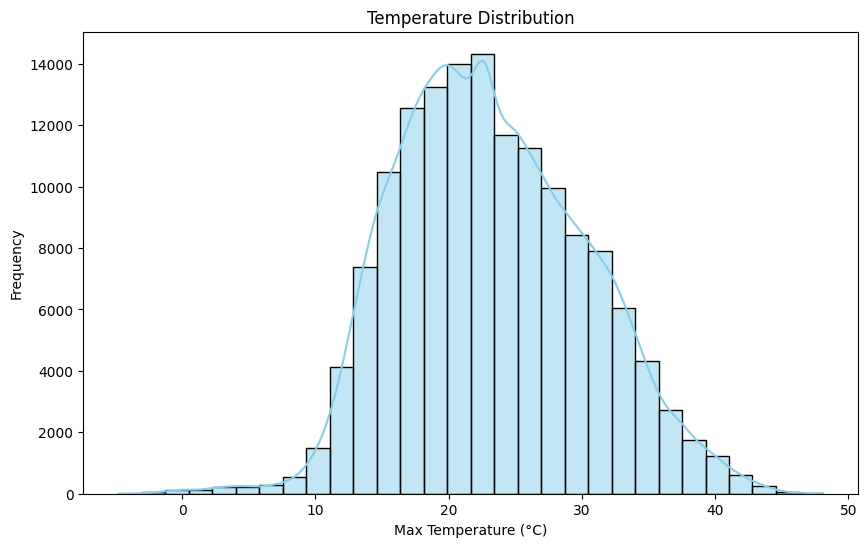

Skewness of Max Temperature: 0.22405477756945044


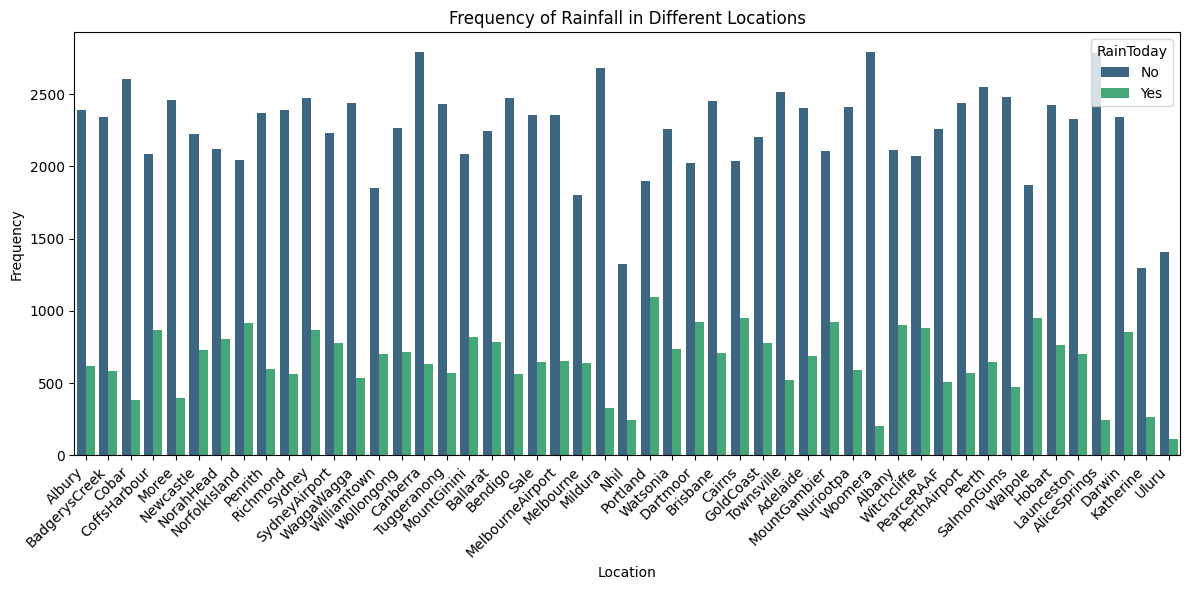

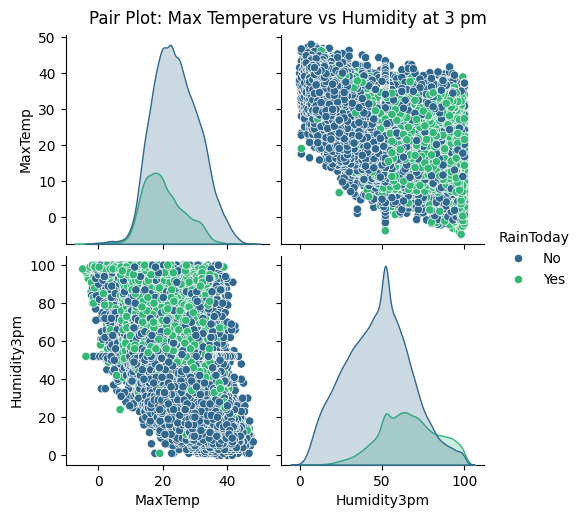

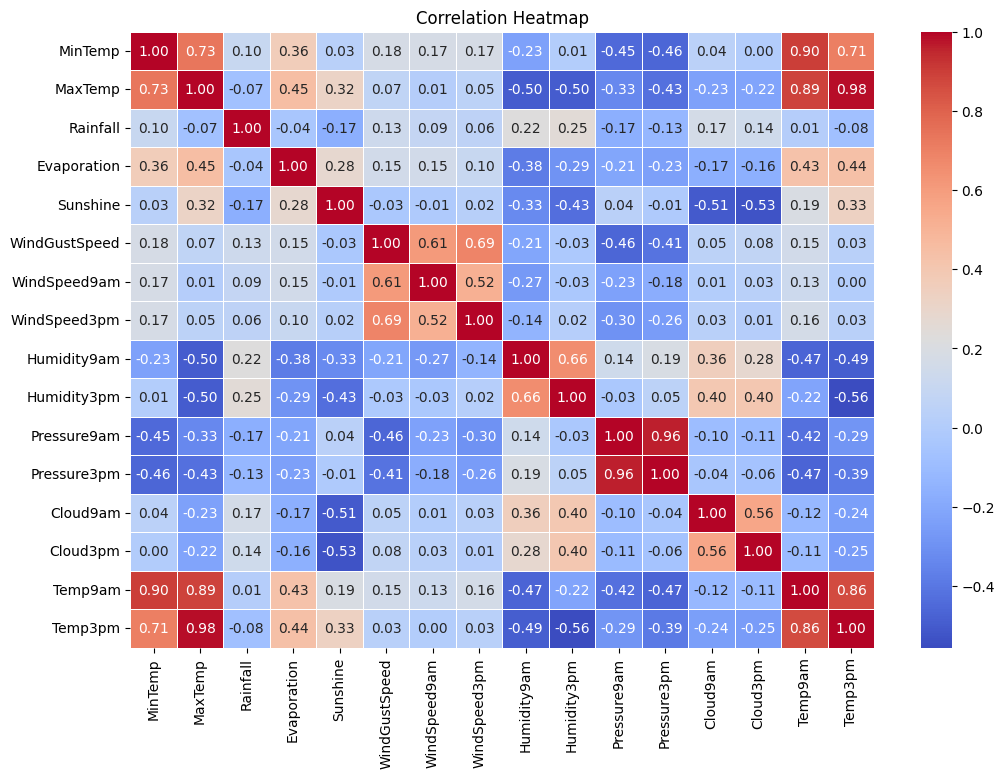

In [23]:
# Visualize temperature distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['MaxTemp'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')
plt.savefig('Temperature_Distribution.png')
plt.show()

# Analyze skewness and identify outliers in temperature data
temperature_skewness = weather_data['MaxTemp'].skew()
print(f"Skewness of Max Temperature: {temperature_skewness}")

# Plot a bar chart for the frequency of rainfall in different locations
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='RainToday', data=weather_data, palette='viridis')
plt.title('Frequency of Rainfall in Different Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Rainfall_Frequency.png')
plt.show()

# Bivariate Analysis

# Scatter plot: Explore the correlation between temperature and humidity
sns.pairplot(weather_data, vars=['MaxTemp', 'Humidity3pm'], hue='RainToday', palette='viridis')
plt.suptitle('Pair Plot: Max Temperature vs Humidity at 3 pm', y=1.02)
plt.savefig('Pairplot_Temperature_Humidity.png')
plt.show()


# Heatmap: Visualize correlations among numeric variables
numeric_cols = weather_data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig('Correlation_Plot.png')
plt.show()
